# Import the Necessary Python Libraries and Components

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.ensemble import BaggingRegressor,RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score, r2_score, accuracy_score, f1_score, precision_score
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from imblearn.over_sampling import RandomOverSampler

import warnings
from sklearn.model_selection import GridSearchCV


### Preprocessing

In [ ]:
df = pd.read_csv("/content/train.csv")
# X = df.iloc[:, :-1]
# Y = df.iloc[:, -1]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=1)

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
df.loc[df["Volume"] == "-", "Volume"] = None
print(df.isnull().sum())
# df.dropna()
df= df.drop(["Volume"], axis=1)

Date            0
Open            0
High            0
Low             0
Close           0
Volume        243
Market Cap      0
dtype: int64


In [ ]:
df["Market Cap"] = df["Market Cap"].str.replace(',', '').astype(float)
# df["Volume"] = df["Volume"].str.replace(',', '').astype(float)

In [ ]:
df.drop(['Date'], axis=1, inplace =True)

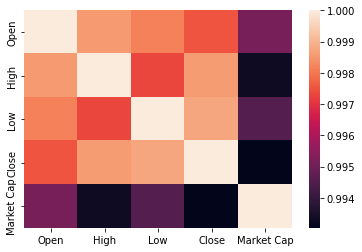

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,5.826253e+02,5.231373e+02,6.850000e+01,2.542875e+02,4.386000e+02,6.624375e+02,2.953220e+03
High,1556.0,5.979928e+02,5.429929e+02,7.456000e+01,2.603275e+02,4.475600e+02,6.745250e+02,2.999910e+03
Low,1556.0,5.678514e+02,5.058774e+02,6.553000e+01,2.488350e+02,4.305700e+02,6.467350e+02,2.840530e+03
Close,1556.0,5.842394e+02,5.259044e+02,6.843000e+01,2.543200e+02,4.388550e+02,6.634025e+02,2.958110e+03
Market Cap,1556.0,8.694353e+09,8.707288e+09,7.792550e+08,3.598355e+09,6.386210e+09,9.898830e+09,4.839120e+10


Text(0.5, 1.0, 'Market Cap')

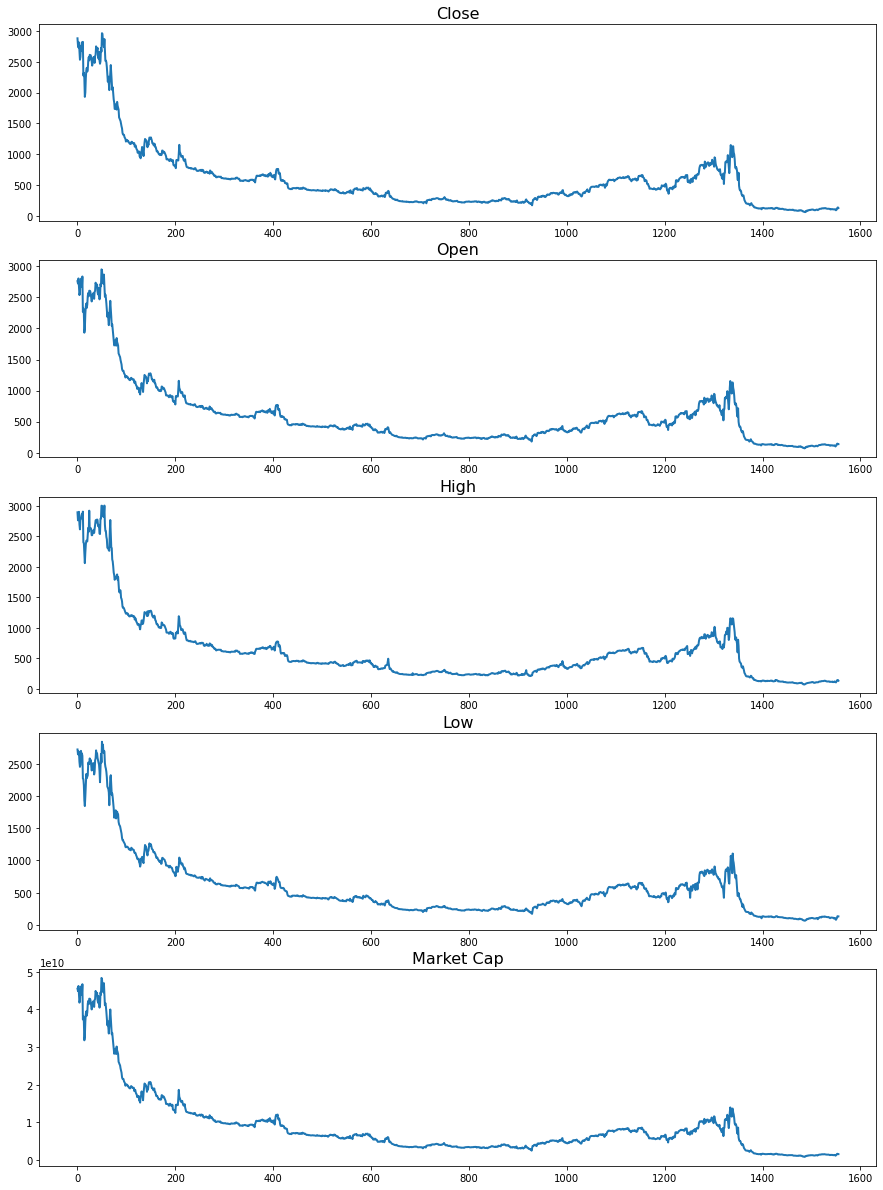

In [ ]:
fig, ax = plt.subplots(5, figsize=(15, 21))
# x= [i for i in range(30)]
ax[0].plot(df["Close"], label='Close', linewidth=2)
ax[1].plot(df["Open"], label='Open', linewidth=2)
ax[2].plot(df["High"], label='High', linewidth=2)
ax[3].plot(df["Low"], label='Low', linewidth=2)
ax[4].plot(df["Market Cap"], label='Market Cap', linewidth=2)
# ax.set_ylabel('Price USD', fontsize=14)
ax[0].set_title('Close', fontsize=16)
ax[1].set_title('Open', fontsize=16)
ax[2].set_title('High', fontsize=16)
ax[3].set_title('Low', fontsize=16)
ax[4].set_title('Market Cap', fontsize=16)

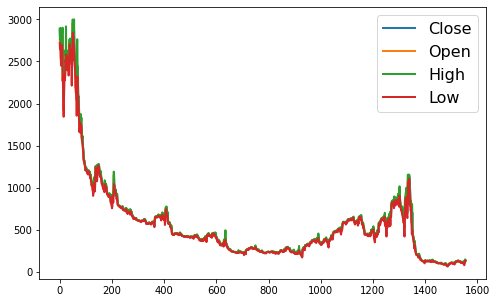

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))
# x= [i for i in range(30)]
ax.plot(df["Close"], label='Close', linewidth=2)
ax.plot(df["Open"], label='Open', linewidth=2)
ax.plot(df["High"], label='High', linewidth=2)
ax.plot(df["Low"], label='Low', linewidth=2)
# ax.plot(df["Market Cap"], label='Market Cap', linewidth=2)
ax.legend(loc='best', fontsize=16)

# ax.set_ylabel('Price USD', fontsize=14)
# ax[0].set_title('Close', fontsize=16)
# ax[1].set_title('Open', fontsize=16)
# ax[2].set_title('High', fontsize=16)
# ax[3].set_title('Low', fontsize=16)
# ax[4].set_title('Market Cap', fontsize=16)

In [ ]:
# train-test split
df_new = pd.DataFrame(df["Close"])
# scaler = MinMaxScaler()
# df_new['Close'] = scaler.fit_transform(df_new['Close'].values.reshape(-1,1))
n = len(df_new)
train = df_new[0:int(n*0.7)]
test  = df_new[int(0.7*n):]
def create_df(df, past_days=3):
    X, Y = [], []
    df= df.values
    for i in range(len(df)-past_days-1):
        a = df[i:(i+past_days)]
        X.append(a)
        Y.append(df[i + past_days])
    return pd.DataFrame(np.array(X)), pd.DataFrame(np.array(Y))
X_train, Y_train = create_df(train['Close'])
X_test, Y_test = create_df(test['Close'])

In [ ]:
X_train

,0,1,2
0,2875.34,2757.18,2726.45
1,2757.18,2726.45,2809.01
2,2726.45,2809.01,2671.78
3,2809.01,2671.78,2529.45
4,2671.78,2529.45,2576.48
...,...,...,...
1080,519.71,497.01,505.97
1081,497.01,505.97,546.66
1082,505.97,546.66,569.64
1083,546.66,569.64,576.37


## LGBMRegressor

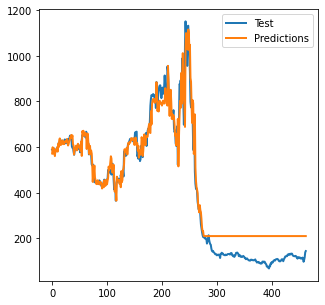

In [ ]:
lgb = LGBMRegressor(n_estimators = 10000)
lgb.fit(X_train, Y_train)
pred = lgb.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5,5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred, label='Predictions', linewidth=2)
ax.legend(loc='best')

## Linear Regressor

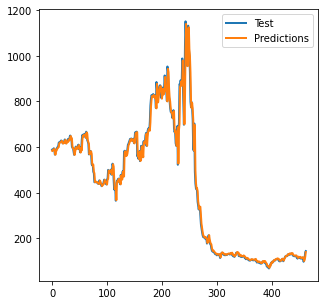

In [ ]:
linearR = LinearRegression()
linearR.fit(X_train, Y_train)
pred1 = linearR.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5,5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred1, label='Predictions', linewidth=2)
ax.legend(loc='best')

## XGBRegressor

[17:22:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


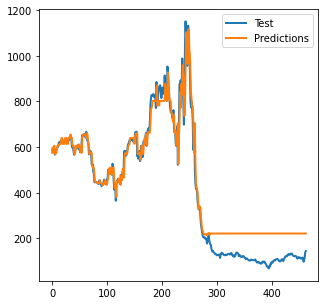

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
pred2 = xgb.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5,5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred2, label='Predictions', linewidth=2)
ax.legend(loc='best')

## Ridge

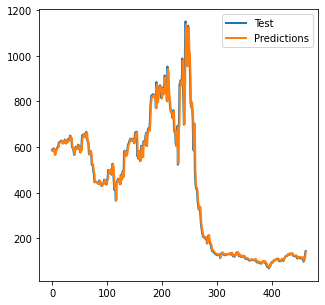

In [ ]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
pred3 = ridge.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5, 5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred3, label='Predictions', linewidth=2)
ax.legend(loc='best')

## Random Forest Regressor

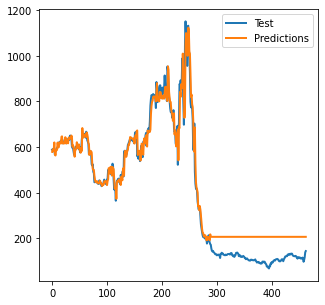

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
pred4 = rfr.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5, 5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred4, label='Predictions', linewidth=2)
ax.legend(loc='best')

## Bagging Regressor

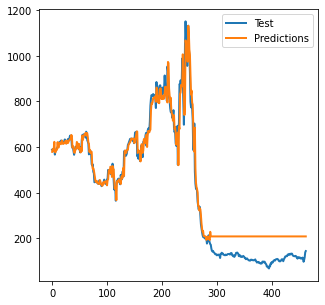

In [ ]:
bgr = BaggingRegressor()
bgr.fit(X_train, Y_train)
pred5 = bgr.predict(X_test)
fig, ax = plt.subplots(1, figsize=(5, 5))
# x= [i for i in range(30)]
ax.plot(Y_test, label='Test', linewidth=2)
ax.plot(pred5, label='Predictions', linewidth=2)
ax.legend(loc='best')

In [ ]:
print("MSE for LGBMRegressor: ", mse(Y_test, pred))
print("MSE for LinearRegressor: ", mse(Y_test, pred1))
print("MSE for XGBRegressor: ", mse(Y_test, pred2))
print("MSE for Ridge: ", mse(Y_test, pred3))
print("MSE for RandomForestRegressor: ", mse(Y_test, pred4))
print("MSE for BaggingRegressor: ", mse(Y_test, pred5))
print("R2 Score for LGBMRegressor: ", r2_score(Y_test, pred))
print("R2 Score for LinearRegressor: ", r2_score(Y_test, pred1))
print("R2 Score for XGBRegressor: ", r2_score(Y_test, pred2))
print("R2 Score for Ridge: ", r2_score(Y_test, pred3))
print("R2 Score for RandomForestRegressor: ", r2_score(Y_test, pred4))
print("R2 Score for BaggingRegressor: ", r2_score(Y_test, pred5))

MSE for LGBMRegressor:  5231.377979602196
MSE for LinearRegressor:  1183.0433097939244
MSE for XGBRegressor:  5730.441994907811
MSE for Ridge:  1183.0433690649097
MSE for RandomForestRegressor:  4946.343200508659
MSE for BaggingRegressor:  5249.578489174943
R2 Score for LGBMRegressor:  0.9335338424212141
R2 Score for LinearRegressor:  0.9849690954547943
R2 Score for XGBRegressor:  0.9271930909762712
R2 Score for Ridge:  0.9849690947017394
R2 Score for RandomForestRegressor:  0.9371552910369583
R2 Score for BaggingRegressor:  0.9333025997272253


## Forecasting

In [ ]:
close = []
for i in range(len(df_new)):
  closei=[]
  for j in range(30):
    if(i-j>0):
      closei.append(df_new.iloc[i-j,0])
    else:
      closei.append(None)
  close.append(closei)

In [ ]:
df2 = pd.DataFrame(close)
y2= df["Close"]

In [ ]:
df2.dropna(inplace = True)

In [ ]:
y21 = y2[30:]
y21

30      2434.55
31      2480.84
32      2539.32
33      2574.79
34      2552.45
         ...   
1551     105.21
1552     116.99
1553     139.00
1554     144.54
1555     134.21
Name: Close, Length: 1526, dtype: float64

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
30,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,2518.44,2372.56,...,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45,2757.18
31,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,2518.44,...,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01,2726.45
32,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,2571.34,...,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78,2809.01
33,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,2518.66,...,2318.88,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45,2671.78
34,2552.45,2574.79,2539.32,2480.84,2434.55,2506.47,2564.06,2601.64,2601.99,2608.56,...,2228.41,2318.88,2273.43,2817.60,2667.76,2810.12,2730.40,2754.86,2576.48,2529.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,105.21,97.75,112.50,115.91,112.30,111.50,113.57,112.67,117.20,115.24,...,123.89,126.70,133.20,131.98,133.48,129.75,129.00,132.30,128.80,129.00
1552,116.99,105.21,97.75,112.50,115.91,112.30,111.50,113.57,112.67,117.20,...,122.88,123.89,126.70,133.20,131.98,133.48,129.75,129.00,132.30,128.80
1553,139.00,116.99,105.21,97.75,112.50,115.91,112.30,111.50,113.57,112.67,...,122.00,122.88,123.89,126.70,133.20,131.98,133.48,129.75,129.00,132.30
1554,144.54,139.00,116.99,105.21,97.75,112.50,115.91,112.30,111.50,113.57,...,121.99,122.00,122.88,123.89,126.70,133.20,131.98,133.48,129.75,129.00


In [ ]:
linearR = LinearRegression()
linearR.fit(df2, y21)
dfv = df2.values
y2v= y21.values

def forecast(df, days = 30):
  df3 = df.copy()
  pred = [y2v[-1]]
  for i in range(days):
    dfv = df3.values
    # last = len(df2) -1
    k = list(dfv[-1][0:29])[::-1]
    k.append(pred[i])
    df3 = pd.concat([df3, pd.DataFrame(np.array(k[::-1]).reshape(1,-1))], ignore_index = True)
    df3.reset_index()
    pred.append(linearR.predict(df3.values[-1].reshape(1, -1))[0])

  return df3

In [ ]:
warnings.filterwarnings(action='ignore', category=UserWarning)
df3 = forecast(df2.iloc[:-30,:])
df4 = forecast(df2.iloc[:-500,:], 500)
# y2v[-1]
# dfv[-1][0:30]

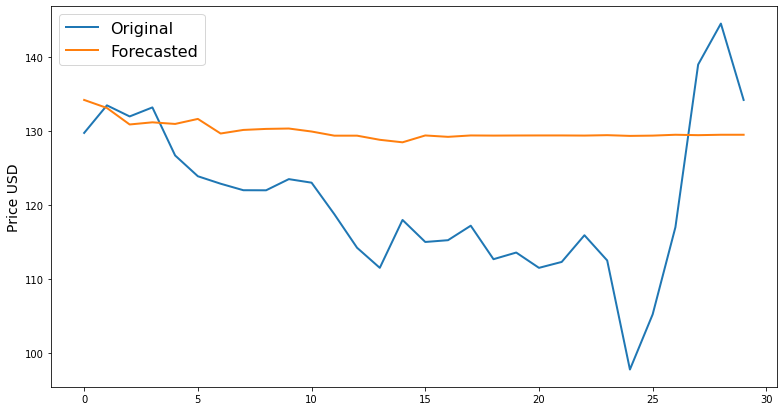

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
x= [i for i in range(30)]
ax.plot(x,df2.iloc[-30::,0], label='Original', linewidth=2)
ax.plot(x,df3.iloc[-30::,0], label='Forecasted', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

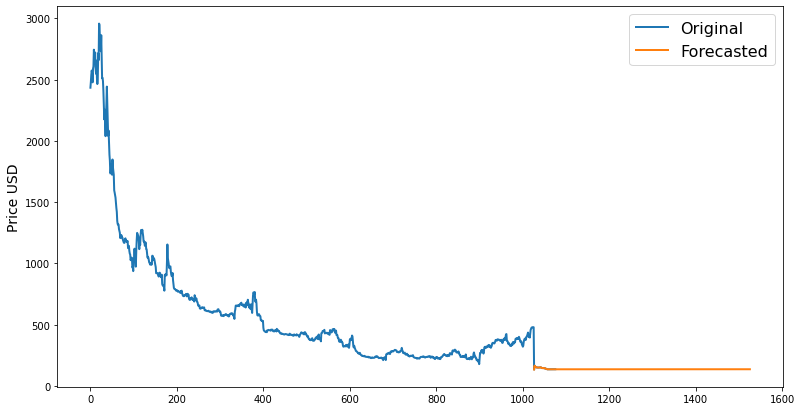

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
x= [i for i in range(30)]
ax.plot(df4.iloc[:-450,0], label='Original', linewidth=2)
ax.plot(df4.iloc[-500::,0], label='Forecasted', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
x= [i for i in range(30)]
ax.plot(x,df2.iloc[-30::,0], label='Original', linewidth=2)
ax.plot(x,df3.iloc[-30::,0], label='Forecasted', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

